# Import Libraries

In [1]:
import numpy as np
import pandas as pd

# Loading the Data and Selecting the Features

### Import Data

In [12]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets.train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0)

### Explore Data

In [13]:
loan_data_inputs_train.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,1,0,0,1,0,0,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,1,0,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,1,0,0,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,1,0,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,1,0,1,0,0,0,0,0,0


In [14]:
loan_data_targets_train.head()

,good_bad
427211,1
206088,1
136020,1
412305,0
36159,0


In [15]:
loan_data_inputs_train.shape

(373028, 324)

In [16]:
loan_data_targets_train.shape

(373028, 1)

In [17]:
loan_data_inputs_test.shape

(93257, 324)

In [18]:
loan_data_targets_test.shape

(93257, 1)

### Selecting the Features

In [22]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86']]

In [23]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [24]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86
427211,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,1,0,0,0,1,0,0,0,0


## LOGISTIC REGRESSION

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
from sklearn import metrics

In [27]:
reg = LogisticRegression()

In [28]:
pd.options.display.max_rows = None

In [29]:
reg.fit(inputs_train, loan_data_targets_train)

/Users/sov11/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sov11/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
reg.intercept_

array([-1.03329097])

In [31]:
 reg.coef_

array([[ 1.18947914,  0.91365395,  0.713962  ,  0.52149625,  0.33996632,
         0.14858635,  0.09173843,  0.10743325,  0.03768994,  0.05992353,
         0.05977897,  0.06318531,  0.07967548,  0.13744465,  0.1004509 ,
         0.186402  ,  0.2503993 ,  0.22459544,  0.26386231,  0.32166458,
         0.52020982,  0.08600496, -0.01226993,  0.29518032,  0.19281717,
         0.20469644,  0.25802802,  0.0548901 ,  0.07643348,  0.0966868 ,
         0.12419172,  0.0893408 ,  0.05989363,  0.12146452,  1.0980959 ,
         0.89494373,  0.79734309,  0.59538277,  0.43247124,  0.18758417,
        -0.05051221,  0.83089562,  0.53911769,  0.29140769,  0.10482544,
         0.05215986,  0.03602747,  0.07606788,  0.11690623,  0.12337531,
         0.05580381,  0.02846819,  0.53606623,  0.39311567,  0.18128849,
         0.01051502, -0.08638823, -0.11334654, -0.12899849, -0.12074797,
        -0.11125734, -0.19057788,  0.12282552,  0.15409826, -0.02161867,
         0.03335471,  0.26091534,  0.04126847,  0.0

In [32]:
feature_name = inputs_train.columns.values

In [33]:
summary_table = pd.DataFrame(columns= ['Feature name'], data = feature_name)
summary_table['Coefficient'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficient
0,Intercept,-1.033291
1,grade:A,1.189479
2,grade:B,0.913654
3,grade:C,0.713962
4,grade:D,0.521496
5,grade:E,0.339966
6,grade:F,0.148586
7,home_ownership:OWN,0.091738
8,home_ownership:MORTGAGE,0.107433
9,addr_state:NM_VA,0.037690


## Logistic regression with p-values


In [34]:
from sklearn import linear_model
import scipy.stats as stat


class LogisticRegression_with_p_values:

    def __init__(self, *args, **kwargs):
        self.model = linear_model.LogisticRegression(*args, **kwargs)

    def fit(self, X, y):
        self.model.fit(X, y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom, (X.shape[1], 1)).T
        F_ij = np.dot((X / denom).T, X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values


In [35]:
reg = LogisticRegression_with_p_values()

In [36]:
reg.fit(inputs_train, loan_data_targets_train)

/Users/sov11/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sov11/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.033291
1,grade:A,1.189479
2,grade:B,0.913654
3,grade:C,0.713962
4,grade:D,0.521496
5,grade:E,0.339966
6,grade:F,0.148586
7,home_ownership:OWN,0.091738
8,home_ownership:MORTGAGE,0.107433
9,addr_state:NM_VA,0.037690


In [38]:
p_values = reg.p_values

In [39]:
p_values = np.append(np.nan, np.array(p_values))

In [40]:
summary_table['p_values'] = p_values

In [41]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.033291,NaN
1,grade:A,1.189479,8.858433e-40
2,grade:B,0.913654,8.361548e-51
3,grade:C,0.713962,1.491223e-36
4,grade:D,0.521496,2.755467e-22
5,grade:E,0.339966,1.485936e-12
6,grade:F,0.148586,3.020829e-03
7,home_ownership:OWN,0.091738,5.441355e-06
8,home_ownership:MORTGAGE,0.107433,2.672645e-17
9,addr_state:NM_VA,0.037690,2.398252e-01


Cross check dummy variables with p-values to choose the next variables in the sheet.
after checking, we can remove delinq_2yrs, open_acc, pub_rec, total_rev_hi_lim, total_acc


In [43]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
                                                            'grade:B',
                                                            'grade:C',
                                                            'grade:D',
                                                            'grade:E',
                                                            'grade:F',
                                                            'grade:G',
                                                            'home_ownership:RENT_OTHER_NONE_ANY',
                                                            'home_ownership:OWN',
                                                            'home_ownership:MORTGAGE',
                                                            'addr_state:ND_NE_IA_NV_FL_HI_AL',
                                                            'addr_state:NM_VA',
                                                            'addr_state:NY',
                                                            'addr_state:OK_TN_MO_LA_MD_NC',
                                                            'addr_state:CA',
                                                            'addr_state:UT_KY_AZ_NJ',
                                                            'addr_state:AR_MI_PA_OH_MN',
                                                            'addr_state:RI_MA_DE_SD_IN',
                                                            'addr_state:GA_WA_OR',
                                                            'addr_state:WI_MT',
                                                            'addr_state:TX',
                                                            'addr_state:IL_CT',
                                                            'addr_state:KS_SC_CO_VT_AK_MS',
                                                            'addr_state:WV_NH_WY_DC_ME_ID',
                                                            'verification_status:Not Verified',
                                                            'verification_status:Source Verified',
                                                            'verification_status:Verified',
                                                            'purpose:educ__sm_b__wedd__ren_en__mov__house',
                                                            'purpose:credit_card',
                                                            'purpose:debt_consolidation',
                                                            'purpose:oth__med__vacation',
                                                            'purpose:major_purch__car__home_impr',
                                                            'initial_list_status:f',
                                                            'initial_list_status:w',
                                                            'term:36',
                                                            'term:60',
                                                            'emp_length:0',
                                                            'emp_length:1',
                                                            'emp_length:2-4',
                                                            'emp_length:5-6',
                                                            'emp_length:7-9',
                                                            'emp_length:10',
                                                            'mths_since_issue_d:<38',
                                                            'mths_since_issue_d:38-39',
                                                            'mths_since_issue_d:40-41',
                                                            'mths_since_issue_d:42-48',
                                                            'mths_since_issue_d:49-52',
                                                            'mths_since_issue_d:53-64',
                                                            'mths_since_issue_d:65-84',
                                                            'mths_since_issue_d:>84',
                                                            'int_rate:<9.548',
                                                            'int_rate:9.548-12.025',
                                                            'int_rate:12.025-15.74',
                                                            'int_rate:15.74-20.281',
                                                            'int_rate:>20.281',
                                                            'mths_since_earliest_cr_line:<140',
                                                            'mths_since_earliest_cr_line:141-164',
                                                            'mths_since_earliest_cr_line:165-247',
                                                            'mths_since_earliest_cr_line:248-270',
                                                            'mths_since_earliest_cr_line:271-352',
                                                            'mths_since_earliest_cr_line:>352',
                                                            'inq_last_6mths:0',
                                                            'inq_last_6mths:1-2',
                                                            'inq_last_6mths:3-6',
                                                            'inq_last_6mths:>6',
                                                            'acc_now_delinq:0',
                                                            'acc_now_delinq:>=1',
                                                            'annual_inc:<20K',
                                                            'annual_inc:20K-30K',
                                                            'annual_inc:30K-40K',
                                                            'annual_inc:40K-50K',
                                                            'annual_inc:50K-60K',
                                                            'annual_inc:60K-70K',
                                                            'annual_inc:70K-80K',
                                                            'annual_inc:80K-90K',
                                                            'annual_inc:90K-100K',
                                                            'annual_inc:100K-120K',
                                                            'annual_inc:120K-140K',
                                                            'annual_inc:>140K',
                                                            'dti:<=1.4',
                                                            'dti:1.4-3.5',
                                                            'dti:3.5-7.7',
                                                            'dti:7.7-10.5',
                                                            'dti:10.5-16.1',
                                                            'dti:16.1-20.3',
                                                            'dti:20.3-21.7',
                                                            'dti:21.7-22.4',
                                                            'dti:22.4-35',
                                                            'dti:>35',
                                                            'mths_since_last_delinq:Missing',
                                                            'mths_since_last_delinq:0-3',
                                                            'mths_since_last_delinq:4-30',
                                                            'mths_since_last_delinq:31-56',
                                                            'mths_since_last_delinq:>=57',
                                                            'mths_since_last_record:Missing',
                                                            'mths_since_last_record:0-2',
                                                            'mths_since_last_record:3-20',
                                                            'mths_since_last_record:21-31',
                                                            'mths_since_last_record:32-80',
                                                            'mths_since_last_record:81-86' ]]

In [44]:
ref_categories = ['grade:G',
                  'home_ownership:RENT_OTHER_NONE_ANY',
                  'addr_state:ND_NE_IA_NV_FL_HI_AL',
                  'verification_status:Verified',
                  'purpose:educ__sm_b__wedd__ren_en__mov__house',
                  'initial_list_status:f',
                  'term:60',
                  'emp_length:0',
                  'mths_since_issue_d:>84',
                  'int_rate:>20.281',
                  'mths_since_earliest_cr_line:<140',
                  'inq_last_6mths:>6',
                  'acc_now_delinq:0',
                  'annual_inc:<20K',
                  'dti:>35',
                  'mths_since_last_delinq:0-3',
                  'mths_since_last_record:0-2']

In [45]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86
427211,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,1,0,0,0,1,0,0,0,0


In [46]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

/Users/sov11/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sov11/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
feature_name = inputs_train.columns.values

In [48]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.286571
1,grade:A,1.155580
2,grade:B,0.912933
3,grade:C,0.716380
4,grade:D,0.525329
5,grade:E,0.342265
6,grade:F,0.152201
7,home_ownership:OWN,0.093714
8,home_ownership:MORTGAGE,0.106218
9,addr_state:NM_VA,0.036098


In [49]:
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.286571,NaN
1,grade:A,1.155580,2.051584e-37
2,grade:B,0.912933,2.737673e-51
3,grade:C,0.716380,2.230266e-37
4,grade:D,0.525329,4.199337e-23
5,grade:E,0.342265,3.049564e-13
6,grade:F,0.152201,1.813407e-03
7,home_ownership:OWN,0.093714,3.283229e-06
8,home_ownership:MORTGAGE,0.106218,4.431427e-17
9,addr_state:NM_VA,0.036098,2.594280e-01


In [50]:
import pickle

In [51]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))

TESTING THE MODEL 1.1 - OUT OF SAMPLE TEST

In [52]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
                                                          'grade:B',
                                                          'grade:C',
                                                          'grade:D',
                                                          'grade:E',
                                                          'grade:F',
                                                          'grade:G',
                                                          'home_ownership:RENT_OTHER_NONE_ANY',
                                                          'home_ownership:OWN',
                                                          'home_ownership:MORTGAGE',
                                                          'addr_state:ND_NE_IA_NV_FL_HI_AL',
                                                          'addr_state:NM_VA',
                                                          'addr_state:NY',
                                                          'addr_state:OK_TN_MO_LA_MD_NC',
                                                          'addr_state:CA',
                                                          'addr_state:UT_KY_AZ_NJ',
                                                          'addr_state:AR_MI_PA_OH_MN',
                                                          'addr_state:RI_MA_DE_SD_IN',
                                                          'addr_state:GA_WA_OR',
                                                          'addr_state:WI_MT',
                                                          'addr_state:TX',
                                                          'addr_state:IL_CT',
                                                          'addr_state:KS_SC_CO_VT_AK_MS',
                                                          'addr_state:WV_NH_WY_DC_ME_ID',
                                                          'verification_status:Not Verified',
                                                          'verification_status:Source Verified',
                                                          'verification_status:Verified',
                                                          'purpose:educ__sm_b__wedd__ren_en__mov__house',
                                                          'purpose:credit_card',
                                                          'purpose:debt_consolidation',
                                                          'purpose:oth__med__vacation',
                                                          'purpose:major_purch__car__home_impr',
                                                          'initial_list_status:f',
                                                          'initial_list_status:w',
                                                          'term:36',
                                                          'term:60',
                                                          'emp_length:0',
                                                          'emp_length:1',
                                                          'emp_length:2-4',
                                                          'emp_length:5-6',
                                                          'emp_length:7-9',
                                                          'emp_length:10',
                                                          'mths_since_issue_d:<38',
                                                          'mths_since_issue_d:38-39',
                                                          'mths_since_issue_d:40-41',
                                                          'mths_since_issue_d:42-48',
                                                          'mths_since_issue_d:49-52',
                                                          'mths_since_issue_d:53-64',
                                                          'mths_since_issue_d:65-84',
                                                          'mths_since_issue_d:>84',
                                                          'int_rate:<9.548',
                                                          'int_rate:9.548-12.025',
                                                          'int_rate:12.025-15.74',
                                                          'int_rate:15.74-20.281',
                                                          'int_rate:>20.281',
                                                          'mths_since_earliest_cr_line:<140',
                                                          'mths_since_earliest_cr_line:141-164',
                                                          'mths_since_earliest_cr_line:165-247',
                                                          'mths_since_earliest_cr_line:248-270',
                                                          'mths_since_earliest_cr_line:271-352',
                                                          'mths_since_earliest_cr_line:>352',
                                                          'inq_last_6mths:0',
                                                          'inq_last_6mths:1-2',
                                                          'inq_last_6mths:3-6',
                                                          'inq_last_6mths:>6',
                                                          'acc_now_delinq:0',
                                                          'acc_now_delinq:>=1',
                                                          'annual_inc:<20K',
                                                          'annual_inc:20K-30K',
                                                          'annual_inc:30K-40K',
                                                          'annual_inc:40K-50K',
                                                          'annual_inc:50K-60K',
                                                          'annual_inc:60K-70K',
                                                          'annual_inc:70K-80K',
                                                          'annual_inc:80K-90K',
                                                          'annual_inc:90K-100K',
                                                          'annual_inc:100K-120K',
                                                          'annual_inc:120K-140K',
                                                          'annual_inc:>140K',
                                                          'dti:<=1.4',
                                                          'dti:1.4-3.5',
                                                          'dti:3.5-7.7',
                                                          'dti:7.7-10.5',
                                                          'dti:10.5-16.1',
                                                          'dti:16.1-20.3',
                                                          'dti:20.3-21.7',
                                                          'dti:21.7-22.4',
                                                          'dti:22.4-35',
                                                          'dti:>35',
                                                          'mths_since_last_delinq:Missing',
                                                          'mths_since_last_delinq:0-3',
                                                          'mths_since_last_delinq:4-30',
                                                          'mths_since_last_delinq:31-56',
                                                          'mths_since_last_delinq:>=57',
                                                          'mths_since_last_record:Missing',
                                                          'mths_since_last_record:0-2',
                                                          'mths_since_last_record:3-20',
                                                          'mths_since_last_record:21-31',
                                                          'mths_since_last_record:32-80',
                                                          'mths_since_last_record:81-86']]


In [53]:
ref_categories = ['grade:G',
                  'home_ownership:RENT_OTHER_NONE_ANY',
                  'addr_state:ND_NE_IA_NV_FL_HI_AL',
                  'verification_status:Verified',
                  'purpose:educ__sm_b__wedd__ren_en__mov__house',
                  'initial_list_status:f',
                  'term:60',
                  'emp_length:0',
                  'mths_since_issue_d:>84',
                  'int_rate:>20.281',
                  'mths_since_earliest_cr_line:<140',
                  'inq_last_6mths:>6',
                  'acc_now_delinq:0',
                  'annual_inc:<20K',
                  'dti:>35',
                  'mths_since_last_delinq:0-3',
                  'mths_since_last_record:0-2']

In [54]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86
362514,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0


In [55]:
y_hat_test = reg2.model.predict(inputs_test)

In [56]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1])

In [57]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [58]:
y_hat_test_proba

array([[0.07551377, 0.92448623],
       [0.15695312, 0.84304688],
       [0.11449883, 0.88550117],
       ...,
       [0.02674708, 0.97325292],
       [0.0401859 , 0.9598141 ],
       [0.04776315, 0.95223685]])

In [59]:
y_hat_test_proba[: ][: , 1]

array([0.92448623, 0.84304688, 0.88550117, ..., 0.97325292, 0.9598141 ,
       0.95223685])

In [60]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]

In [61]:
y_hat_test_proba

array([0.92448623, 0.84304688, 0.88550117, ..., 0.97325292, 0.9598141 ,
       0.95223685])

In [62]:
loan_data_targets_test_temp = loan_data_targets_test

In [63]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [64]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

In [65]:
df_actual_predicted_probs.shape

(93257, 2)

In [66]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [67]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [68]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.924486
288564,1,0.843047
213591,1,0.885501
263083,1,0.940708
165001,1,0.968689


area under the curve

In [69]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [70]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
            rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7379,2811
1,35830,47237


In [71]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
            rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.079125,0.030143
1,0.384207,0.506525


In [72]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
             rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
                                                                                                                              rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.5856504069399616

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score

In [74]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99990186, 0.99990186,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.20384750e-04, ...,
        9.99975923e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.99271451, 0.99271451, 0.99072893, ..., 0.43531284, 0.39808094,
        0.3808802 ]))

In [75]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
                                 df_actual_predicted_probs['y_hat_test_proba'])

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

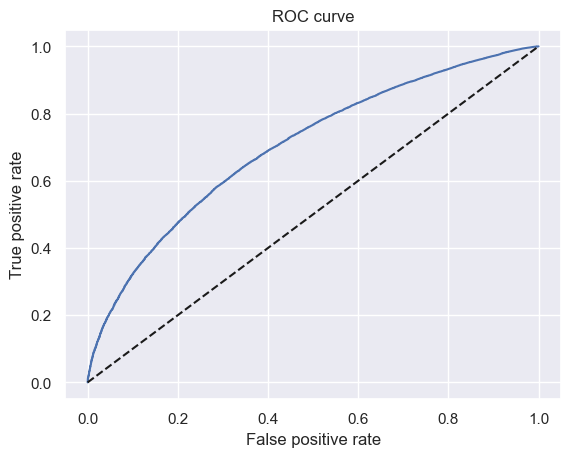

In [77]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [78]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.702082086143192

### Gini and Kolmogorov-Smirnov

In [79]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [80]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
39810,0,0.380880,0
42341,1,0.398081,0
42344,1,0.431715,0
40518,0,0.435313,0
40173,0,0.455464,0


In [81]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
262480,1,0.991275,1
231463,1,0.991296,1
239228,1,0.991680,1
261086,1,0.992112,1
242624,1,0.992715,1


In [82]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [83]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,39810,0,0.380880,0
1,42341,1,0.398081,0
2,42344,1,0.431715,0
3,40518,0,0.435313,0
4,40173,0,0.455464,0


In [84]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()

In [85]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,39810,0,0.380880,0,1,0,1
1,42341,1,0.398081,0,2,1,1
2,42344,1,0.431715,0,3,2,1
3,40518,0,0.435313,0,4,2,2
4,40173,0,0.455464,0,5,2,3


In [86]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())

In [87]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,39810,0,0.380880,0,1,0,1,0.000011,0.000000,0.000098
1,42341,1,0.398081,0,2,1,1,0.000021,0.000012,0.000098
2,42344,1,0.431715,0,3,2,1,0.000032,0.000024,0.000098
3,40518,0,0.435313,0,4,2,2,0.000043,0.000024,0.000196
4,40173,0,0.455464,0,5,2,3,0.000054,0.000024,0.000294


In [88]:
df_actual_predicted_probs.tail()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
93252,262480,1,0.991275,1,93253,83063,10190,0.999957,0.999952,1.0
93253,231463,1,0.991296,1,93254,83064,10190,0.999968,0.999964,1.0
93254,239228,1,0.991680,1,93255,83065,10190,0.999979,0.999976,1.0
93255,261086,1,0.992112,1,93256,83066,10190,0.999989,0.999988,1.0
93256,242624,1,0.992715,1,93257,83067,10190,1.000000,1.000000,1.0


Text(0.5, 1.0, 'Gini')

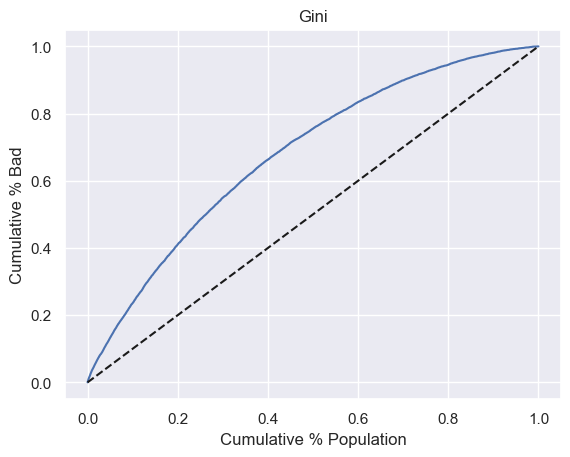

In [89]:
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [90]:
Gini = AUROC * 2 - 1
Gini

0.404164172286384

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

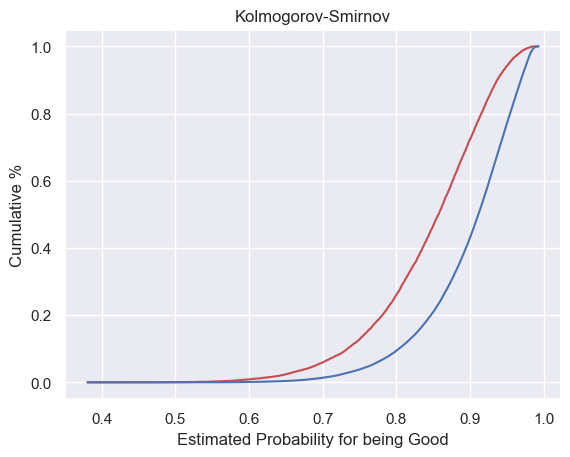

In [91]:
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [92]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.2962249788006473

APPLYING THE MODEL

In [93]:
pd.options.display.max_columns = None

In [94]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [95]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.286571,NaN
1,grade:A,1.155580,2.051584e-37
2,grade:B,0.912933,2.737673e-51
3,grade:C,0.716380,2.230266e-37
4,grade:D,0.525329,4.199337e-23
5,grade:E,0.342265,3.049564e-13
6,grade:F,0.152201,1.813407e-03
7,home_ownership:OWN,0.093714,3.283229e-06
8,home_ownership:MORTGAGE,0.106218,4.431427e-17
9,addr_state:NM_VA,0.036098,2.594280e-01


calculation = coeff + grade1(coeff * grade) +.....+ independent variables(coeff * 0/1)
e^calculation = PD/1-PD


In [96]:
y_hat_test_proba

array([0.92448623, 0.84304688, 0.88550117, ..., 0.97325292, 0.9598141 ,
       0.95223685])

Creating a scorecard

In [97]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.286571,NaN
1,grade:A,1.155580,2.051584e-37
2,grade:B,0.912933,2.737673e-51
3,grade:C,0.716380,2.230266e-37
4,grade:D,0.525329,4.199337e-23
5,grade:E,0.342265,3.049564e-13
6,grade:F,0.152201,1.813407e-03
7,home_ownership:OWN,0.093714,3.283229e-06
8,home_ownership:MORTGAGE,0.106218,4.431427e-17
9,addr_state:NM_VA,0.036098,2.594280e-01


In [98]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [99]:
df_ref_categories = pd.DataFrame(ref_categories, columns=['Feature name'])

df_ref_categories['Coefficients'] = 0

df_ref_categories['p_values'] = np.nan

df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


In [100]:
df_scorecard = pd.concat([summary_table, df_ref_categories])

df_scorecard = df_scorecard.reset_index()

df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-1.286571,NaN
1,1,grade:A,1.155580,2.051584e-37
2,2,grade:B,0.912933,2.737673e-51
3,3,grade:C,0.716380,2.230266e-37
4,4,grade:D,0.525329,4.199337e-23
5,5,grade:E,0.342265,3.049564e-13
6,6,grade:F,0.152201,1.813407e-03
7,7,home_ownership:OWN,0.093714,3.283229e-06
8,8,home_ownership:MORTGAGE,0.106218,4.431427e-17
9,9,addr_state:NM_VA,0.036098,2.594280e-01


In [101]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-1.286571,NaN,Intercept
1,1,grade:A,1.155580,2.051584e-37,grade
2,2,grade:B,0.912933,2.737673e-51,grade
3,3,grade:C,0.716380,2.230266e-37,grade
4,4,grade:D,0.525329,4.199337e-23,grade
5,5,grade:E,0.342265,3.049564e-13,grade
6,6,grade:F,0.152201,1.813407e-03,grade
7,7,home_ownership:OWN,0.093714,3.283229e-06,home_ownership
8,8,home_ownership:MORTGAGE,0.106218,4.431427e-17,home_ownership
9,9,addr_state:NM_VA,0.036098,2.594280e-01,addr_state


In [102]:
min_score = 300
max_score = 850

In [103]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
Intercept                     -1.286571
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.068940
dti                            0.000000
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_d            -0.060625
mths_since_last_delinq         0.000000
mths_since_last_record        -0.049879
purpose                        0.000000
term                           0.000000
verification_status           -0.010560
Name: Coefficients, dtype: float64

In [104]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()

In [105]:
min_sum_coef

-1.476574273470028

In [106]:
df_scorecard.groupby('Original feature name')['Coefficients'].max()

Original feature name
Intercept                     -1.286571
acc_now_delinq                 0.235451
addr_state                     0.524195
annual_inc                     0.577041
dti                            0.389216
emp_length                     0.126174
grade                          1.155580
home_ownership                 0.106218
initial_list_status            0.054820
inq_last_6mths                 0.694464
int_rate                       0.867403
mths_since_earliest_cr_line    0.131429
mths_since_issue_d             1.091989
mths_since_last_delinq         0.239033
mths_since_last_record         0.286681
purpose                        0.300415
term                           0.078657
verification_status            0.084434
Name: Coefficients, dtype: float64

In [107]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()

In [108]:
max_sum_coef

5.6566288077906215

In [109]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)

In [110]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.286571,NaN,Intercept,-99.200005
1,1,grade:A,1.155580,2.051584e-37,grade,89.100099
2,2,grade:B,0.912933,2.737673e-51,grade,70.390989
3,3,grade:C,0.716380,2.230266e-37,grade,55.235906
4,4,grade:D,0.525329,4.199337e-23,grade,40.505113
5,5,grade:E,0.342265,3.049564e-13,grade,26.390099
6,6,grade:F,0.152201,1.813407e-03,grade,11.735326
7,7,home_ownership:OWN,0.093714,3.283229e-06,home_ownership,7.225741
8,8,home_ownership:MORTGAGE,0.106218,4.431427e-17,home_ownership,8.189833
9,9,addr_state:NM_VA,0.036098,2.594280e-01,addr_state,2.783332


In [112]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard

/var/folders/lj/kw7skqr94xn2j__vgtn7xwgw0000gp/T/ipykernel_24479/190479711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.286571,NaN,Intercept,314.650090
1,1,grade:A,1.155580,2.051584e-37,grade,89.100099
2,2,grade:B,0.912933,2.737673e-51,grade,70.390989
3,3,grade:C,0.716380,2.230266e-37,grade,55.235906
4,4,grade:D,0.525329,4.199337e-23,grade,40.505113
5,5,grade:E,0.342265,3.049564e-13,grade,26.390099
6,6,grade:F,0.152201,1.813407e-03,grade,11.735326
7,7,home_ownership:OWN,0.093714,3.283229e-06,home_ownership,7.225741
8,8,home_ownership:MORTGAGE,0.106218,4.431427e-17,home_ownership,8.189833
9,9,addr_state:NM_VA,0.036098,2.594280e-01,addr_state,2.783332


In [113]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-1.286571,NaN,Intercept,314.650090,315.0
1,1,grade:A,1.155580,2.051584e-37,grade,89.100099,89.0
2,2,grade:B,0.912933,2.737673e-51,grade,70.390989,70.0
3,3,grade:C,0.716380,2.230266e-37,grade,55.235906,55.0
4,4,grade:D,0.525329,4.199337e-23,grade,40.505113,41.0
5,5,grade:E,0.342265,3.049564e-13,grade,26.390099,26.0
6,6,grade:F,0.152201,1.813407e-03,grade,11.735326,12.0
7,7,home_ownership:OWN,0.093714,3.283229e-06,home_ownership,7.225741,7.0
8,8,home_ownership:MORTGAGE,0.106218,4.431427e-17,home_ownership,8.189833,8.0
9,9,addr_state:NM_VA,0.036098,2.594280e-01,addr_state,2.783332,3.0


In [114]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()

In [115]:
min_sum_score_prel

300.0

In [116]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
max_sum_score_prel

849.0

In [117]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,-1.286571,NaN,Intercept,314.650090,315.0,0.349910
1,1,grade:A,1.155580,2.051584e-37,grade,89.100099,89.0,-0.100099
2,2,grade:B,0.912933,2.737673e-51,grade,70.390989,70.0,-0.390989
3,3,grade:C,0.716380,2.230266e-37,grade,55.235906,55.0,-0.235906
4,4,grade:D,0.525329,4.199337e-23,grade,40.505113,41.0,0.494887
5,5,grade:E,0.342265,3.049564e-13,grade,26.390099,26.0,-0.390099
6,6,grade:F,0.152201,1.813407e-03,grade,11.735326,12.0,0.264674
7,7,home_ownership:OWN,0.093714,3.283229e-06,home_ownership,7.225741,7.0,-0.225741
8,8,home_ownership:MORTGAGE,0.106218,4.431427e-17,home_ownership,8.189833,8.0,-0.189833
9,9,addr_state:NM_VA,0.036098,2.594280e-01,addr_state,2.783332,3.0,0.216668


In [118]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][77] = 16
df_scorecard

/var/folders/lj/kw7skqr94xn2j__vgtn7xwgw0000gp/T/ipykernel_24479/1528914224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][77] = 16


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.286571,NaN,Intercept,314.650090,315.0,0.349910,315.0
1,1,grade:A,1.155580,2.051584e-37,grade,89.100099,89.0,-0.100099,89.0
2,2,grade:B,0.912933,2.737673e-51,grade,70.390989,70.0,-0.390989,70.0
3,3,grade:C,0.716380,2.230266e-37,grade,55.235906,55.0,-0.235906,55.0
4,4,grade:D,0.525329,4.199337e-23,grade,40.505113,41.0,0.494887,41.0
5,5,grade:E,0.342265,3.049564e-13,grade,26.390099,26.0,-0.390099,26.0
6,6,grade:F,0.152201,1.813407e-03,grade,11.735326,12.0,0.264674,12.0
7,7,home_ownership:OWN,0.093714,3.283229e-06,home_ownership,7.225741,7.0,-0.225741,7.0
8,8,home_ownership:MORTGAGE,0.106218,4.431427e-17,home_ownership,8.189833,8.0,-0.189833,8.0
9,9,addr_state:NM_VA,0.036098,2.594280e-01,addr_state,2.783332,3.0,0.216668,3.0


In [119]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()

In [120]:
min_sum_score_prel

300.0

In [121]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()

In [122]:
max_sum_score_prel

847.0

### Caclulating Credit Score


In [123]:
inputs_test_with_ref_cat.head()


,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [124]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.286571,NaN,Intercept,314.650090,315.0,0.349910,315.0
1,1,grade:A,1.155580,2.051584e-37,grade,89.100099,89.0,-0.100099,89.0
2,2,grade:B,0.912933,2.737673e-51,grade,70.390989,70.0,-0.390989,70.0
3,3,grade:C,0.716380,2.230266e-37,grade,55.235906,55.0,-0.235906,55.0
4,4,grade:D,0.525329,4.199337e-23,grade,40.505113,41.0,0.494887,41.0
5,5,grade:E,0.342265,3.049564e-13,grade,26.390099,26.0,-0.390099,26.0
6,6,grade:F,0.152201,1.813407e-03,grade,11.735326,12.0,0.264674,12.0
7,7,home_ownership:OWN,0.093714,3.283229e-06,home_ownership,7.225741,7.0,-0.225741,7.0
8,8,home_ownership:MORTGAGE,0.106218,4.431427e-17,home_ownership,8.189833,8.0,-0.189833,8.0
9,9,addr_state:NM_VA,0.036098,2.594280e-01,addr_state,2.783332,3.0,0.216668,3.0


In [125]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [126]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [127]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86
362514,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
288564,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
213591,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
263083,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
165001,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [128]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [129]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,initial_list_status:f,term:60,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
362514,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0
288564,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
213591,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
263083,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
165001,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0


In [130]:
scorecard_scores = df_scorecard['Score - Final']

In [131]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 101)

In [132]:
scorecard_scores.shape

(101,)

In [134]:
scorecard_scores = scorecard_scores.values.reshape(101, 1)

In [135]:
scorecard_scores.shape

(101, 1)

In [136]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [137]:
y_scores.head()

,0
362514,607.0
288564,544.0
213591,569.0
263083,627.0
165001,677.0


In [138]:
y_scores.tail()

,0
115,568.0
296284,674.0
61777,692.0
91763,659.0
167512,646.0


## credit score to pd

In [139]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef


In [140]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_hat_proba_from_score.head()

,0
362514,0.924495
288564,0.843958
213591,0.882073
263083,0.940724
165001,0.968106


In [141]:
y_hat_test_proba[0: 5]


array([0.92448623, 0.84304688, 0.88550117, 0.94070777, 0.96868937])

In [142]:
df_actual_predicted_probs['y_hat_test_proba'].head()

0    0.380880
1    0.398081
2    0.431715
3    0.435313
4    0.455464
Name: y_hat_test_proba, dtype: float64

In [143]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [144]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
            rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,7379,2811
1,35830,47237


In [145]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
            rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.079125,0.030143
1,0.384207,0.506525


In [146]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
             rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
                                                                                                                              rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.5856504069399616

In [147]:
from sklearn.metrics import roc_curve, roc_auc_score

In [148]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99990186, 0.99990186,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.20384750e-04, ...,
        9.99975923e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.99271451, 0.99271451, 0.99072893, ..., 0.43531284, 0.39808094,
        0.3808802 ]))

In [149]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
                                 df_actual_predicted_probs['y_hat_test_proba'])

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Text(0.5, 1.0, 'ROC curve')

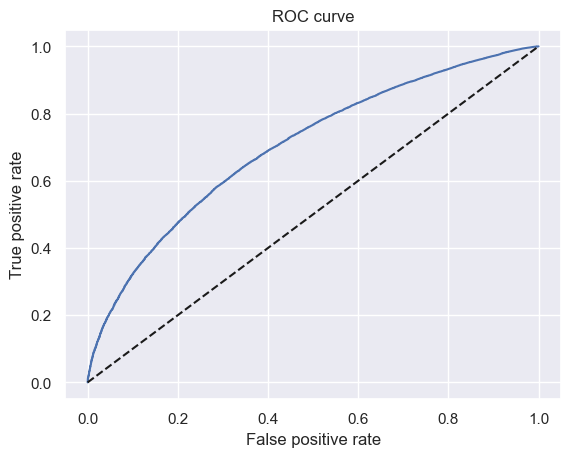

In [151]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [152]:
thresholds

array([1.99271451, 0.99271451, 0.99072893, ..., 0.43531284, 0.39808094,
       0.3808802 ])

In [153]:
thresholds.shape

(17394,)

In [154]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)

In [155]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']

In [156]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.992715,0.000000,0.000000
1,0.992715,0.000000,0.000012
2,0.990729,0.000000,0.000120
3,0.990725,0.000098,0.000120
4,0.989778,0.000098,0.000457


In [157]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)

In [158]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()

In [159]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,3246.0
1,0.992715,0.000000,0.000012,793.0
2,0.990729,0.000000,0.000120,774.0
3,0.990725,0.000098,0.000120,774.0
4,0.989778,0.000098,0.000457,766.0


In [160]:
df_cutoffs['Score'][0] = max_score

In [161]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.992715,0.000000,0.000012,793.0
2,0.990729,0.000000,0.000120,774.0
3,0.990725,0.000098,0.000120,774.0
4,0.989778,0.000098,0.000457,766.0


In [162]:
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [163]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [164]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.992715,0.000000,0.000012,793.0,1,93256,0.000011,0.999989
2,0.990729,0.000000,0.000120,774.0,10,93247,0.000107,0.999893
3,0.990725,0.000098,0.000120,774.0,11,93246,0.000118,0.999882
4,0.989778,0.000098,0.000457,766.0,39,93218,0.000418,0.999582


In [165]:
df_cutoffs.iloc[5000: 6200, ]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5000,0.903549,0.259078,0.547570,586.0,48125,45132,0.516047,0.483953
5001,0.903546,0.259176,0.547570,586.0,48126,45131,0.516058,0.483942
5002,0.903533,0.259176,0.547678,586.0,48135,45122,0.516154,0.483846
5003,0.903533,0.259274,0.547678,586.0,48136,45121,0.516165,0.483835
5004,0.903495,0.259274,0.547835,586.0,48149,45108,0.516304,0.483696
5005,0.903495,0.259372,0.547835,586.0,48150,45107,0.516315,0.483685
5006,0.903479,0.259372,0.547931,586.0,48158,45099,0.516401,0.483599
5007,0.903479,0.259470,0.547931,586.0,48159,45098,0.516412,0.483588
5008,0.903427,0.259470,0.548256,586.0,48186,45071,0.516701,0.483299
5009,0.903427,0.259568,0.548256,586.0,48187,45070,0.516712,0.483288


In [166]:
df_cutoffs.iloc[1000: 2000, ]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1000,0.953127,0.049460,0.207387,646.0,17731,75526,0.190130,0.809870
1001,0.953127,0.049558,0.207387,646.0,17732,75525,0.190141,0.809859
1002,0.953127,0.049558,0.207399,646.0,17733,75524,0.190152,0.809848
1003,0.953124,0.049755,0.207399,646.0,17735,75522,0.190173,0.809827
1004,0.953108,0.049755,0.207567,646.0,17749,75508,0.190324,0.809676
1005,0.953104,0.049853,0.207567,646.0,17750,75507,0.190334,0.809666
1006,0.953103,0.049853,0.207579,646.0,17751,75506,0.190345,0.809655
1007,0.953102,0.049951,0.207579,646.0,17752,75505,0.190356,0.809644
1008,0.953056,0.049951,0.207820,646.0,17772,75485,0.190570,0.809430
1009,0.953056,0.050049,0.207820,646.0,17773,75484,0.190581,0.809419


In [167]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [168]:
df_scorecard.to_csv('df_scorecard.csv')